## Introduction

### Machine learning work flow for modeling

- Understand the data
- Prepare Data: Define relevant features
- Build a modeling: Train a model prototype
- Perform model selection & Validation: Perform model selection and tuning
- Insight & Concludion: generate business insights from mdoeling


## Understand the data

It is the Seattle AirBnb dataset. In order to better understand the data, let's take a look at the characteristics of the dataset.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv('/Users/minyan/Downloads/DSND_Term2-master/Project1WriteADataScienceBlogPost/CreatADataSciencePostwithCRISPDMProcess/Seattle Airbnb Open Data/listings.csv')

In [78]:
df1.head()
df1.describe()
#df1.columns.values

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [79]:
# % of NaN values, list the columns that have fewer than 50% NaN values
set(df1.columns[(len(df1)-df1.count())/len(df1)*100<50])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_review',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'medium

In [80]:
# Create the preliminary house features for price modeling
df1 = df1[['accommodates',
 #'amenities',
 #'availability_30',
 #'availability_365',
 #'availability_60',
 #'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 #'calculated_host_listings_count',
 'cancellation_policy',
 'cleaning_fee',
 #'experiences_offered',
 #'extra_people',
 'host_acceptance_rate',
 'host_is_superhost',
 #'host_listings_count',
 'host_response_rate',
 #'host_response_time',
 #'host_total_listings_count',
 #'instant_bookable',
 'number_of_reviews',
 'price',
 'property_type',
 'review_scores_rating',
 #'review_scores_value',
 #'reviews_per_month',
 'room_type',
 'weekly_price',
 'zipcode'
 ]]


In [81]:
df1.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,host_acceptance_rate,host_is_superhost,host_response_rate,number_of_reviews,price,property_type,review_scores_rating,room_type,weekly_price,zipcode
0,4,1.0,Real Bed,1.0,1.0,moderate,NaN,100%,f,96%,207,$85.00,Apartment,95.0,Entire home/apt,NaN,98119
1,4,1.0,Real Bed,1.0,1.0,strict,$40.00,100%,t,98%,43,$150.00,Apartment,96.0,Entire home/apt,"$1,000.00",98119
2,11,4.5,Real Bed,5.0,7.0,strict,$300.00,100%,f,67%,20,$975.00,House,97.0,Entire home/apt,NaN,98119
3,3,1.0,Real Bed,0.0,2.0,flexible,NaN,NaN,f,NaN,0,$100.00,Apartment,NaN,Entire home/apt,$650.00,98119
4,6,2.0,Real Bed,3.0,3.0,strict,$125.00,NaN,f,100%,38,$450.00,House,92.0,Entire home/apt,NaN,98119


### Provide the number of rows and columns in the datasets

In [82]:
df1_num_rows=df1.shape[0]
df1_num_cols=df1.shape[1]
df1_num_rows

3818

### Which columns have no missing values? Provide a set of column names that have no missing values

In [83]:
df1_no_nulls = set(df1.columns[df1.isnull().mean()==0])
df1_no_nulls

{'accommodates',
 'bed_type',
 'cancellation_policy',
 'number_of_reviews',
 'price',
 'room_type'}

### Which columns have the most missing values? Provide a set of column names that have more than 25% missing values

In [84]:
df1_most_missing_cols = set(df1.columns[df1.isnull().mean()> 0.25])
df1_most_missing_cols

{'cleaning_fee', 'weekly_price'}

### Which columns have numerical, and categorical variables?

In [85]:
num_vars = df1.select_dtypes(include=['int','float']).copy().columns
num_vars.values

array(['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'review_scores_rating'], dtype=object)

In [86]:
cat_vars = df1.select_dtypes(include=['object']).copy().columns
cat_vars.values

array(['bed_type', 'cancellation_policy', 'cleaning_fee',
       'host_acceptance_rate', 'host_is_superhost', 'host_response_rate',
       'price', 'property_type', 'room_type', 'weekly_price', 'zipcode'],
      dtype=object)

In [87]:
for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df2 = pd.concat([df1.drop(var, axis=1), pd.get_dummies(df1[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
df2.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,host_acceptance_rate,host_is_superhost,host_response_rate,...,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122
0,4,1.0,Real Bed,1.0,1.0,moderate,NaN,100%,f,96%,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,Real Bed,1.0,1.0,strict,$40.00,100%,t,98%,...,0,0,0,0,0,0,0,0,0,0
2,11,4.5,Real Bed,5.0,7.0,strict,$300.00,100%,f,67%,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,Real Bed,0.0,2.0,flexible,NaN,NaN,f,NaN,...,0,0,0,0,0,0,0,0,0,0
4,6,2.0,Real Bed,3.0,3.0,strict,$125.00,NaN,f,100%,...,0,0,0,0,0,0,0,0,0,0


### Provide a panda series of 'bed_type', 'cancellation_policy',  'property_type', 'room_type', 'zipcode', and listing price

Text(0.5, 1.0, 'bed_type')

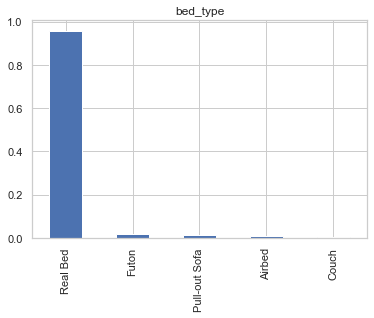

In [88]:
bed_type_vals = df1.bed_type.value_counts()
(bed_type_vals/df1.shape[0]).plot(kind='bar')
plt.title('bed_type')

Text(0.5, 1.0, 'cancellation_policy')

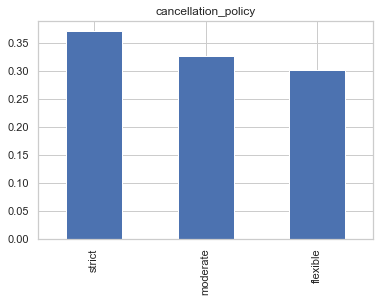

In [89]:
cancellation_policy_vals = df1.cancellation_policy.value_counts()
(cancellation_policy_vals/df1.shape[0]).plot(kind='bar')
plt.title('cancellation_policy')

Text(0.5, 1.0, 'property_type')

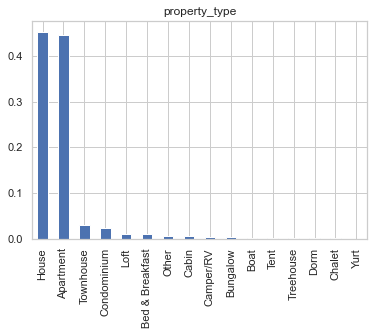

In [90]:
property_type_vals = df1.property_type.value_counts()
(property_type_vals/df1.shape[0]).plot(kind='bar')
plt.title('property_type')

Text(0.5, 1.0, 'room_type')

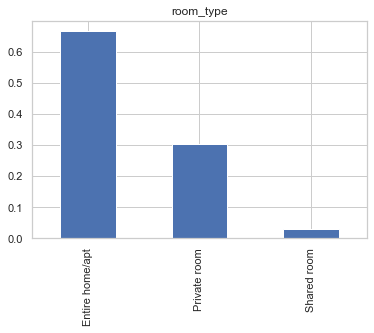

In [91]:
room_type_vals = df1.room_type.value_counts()
(room_type_vals/df1.shape[0]).plot(kind='bar')
plt.title('room_type')

Text(0.5, 1.0, 'zipcode')

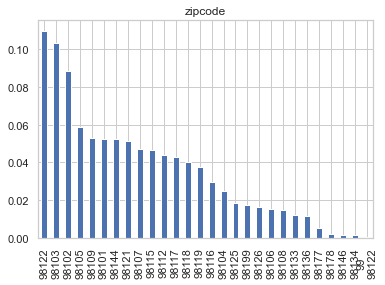

In [92]:
zipcode_vals = df1.zipcode.value_counts()
(zipcode_vals/df1.shape[0]).plot(kind='bar')
plt.title('zipcode')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Histogram of listing prices')

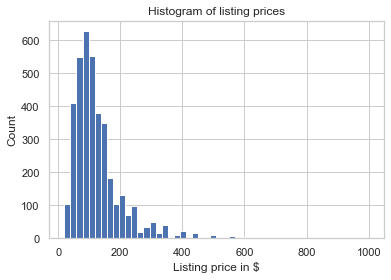

In [93]:
df1['price'].str.replace("[$, ]", "").astype("float").hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

### Provide a series scatter plots of No. of reviews vs price, bedrooms vs price, accommodates vs price,and room_type vs price  

In [94]:
df1['price'] = df1['price'].astype(str)
df1['price'] = df1['price'].str.replace("[$, ]", "").astype("float")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Text(0.5, 1.0, 'number_of_reviews vs price')

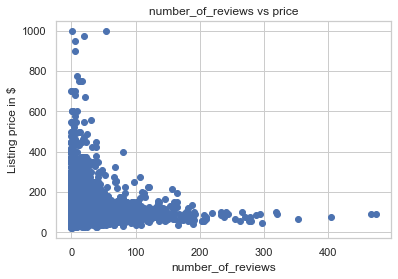

In [95]:
plt.scatter(df1['number_of_reviews'],df1['price'])
plt.ylabel('Listing price in $')
plt.xlabel('number_of_reviews')
plt.title('number_of_reviews vs price')

Text(0.5, 1.0, 'review_scores_rating vs price')

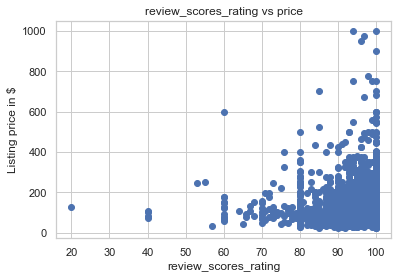

In [96]:
plt.scatter(df1['review_scores_rating'],df1['price'])
plt.ylabel('Listing price in $')
plt.xlabel('review_scores_rating')
plt.title('review_scores_rating vs price')

Text(0.5, 0, 'Listing price in $')

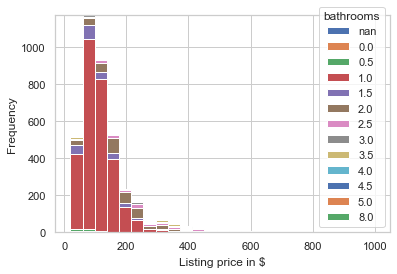

In [97]:
df1.pivot(columns = 'bathrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

Text(0.5, 0, 'Listing price in $')

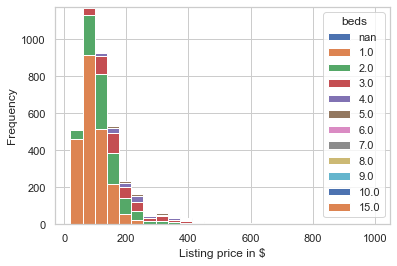

In [98]:
df1.pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

Text(0.5, 0, 'Listing price in $')

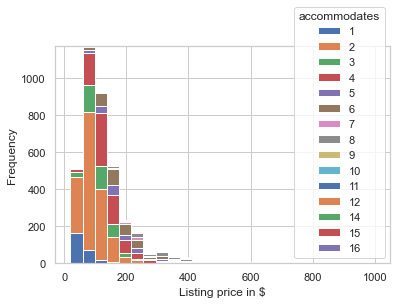

In [99]:
df1.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

Text(0.5, 0, 'Listing price in $')

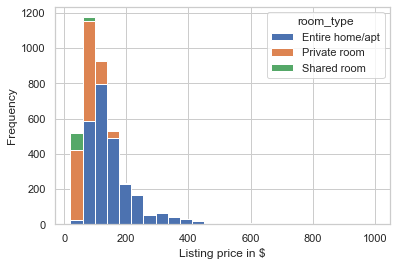

In [100]:
df1.pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')

Text(0.5, 0, 'Listing price in $')

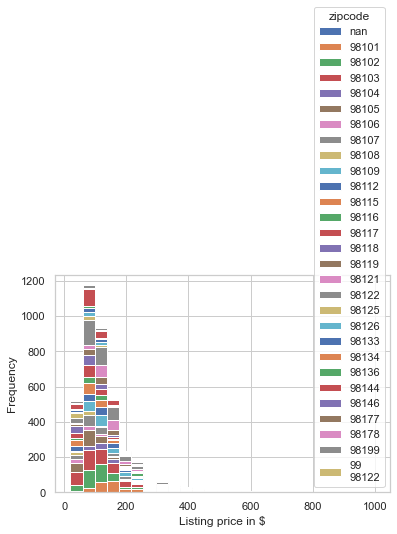

In [101]:
df1.pivot(columns = 'zipcode', values = 'price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')

Use correlation matrix to tell you which variables are related to one another

<AxesSubplot:>

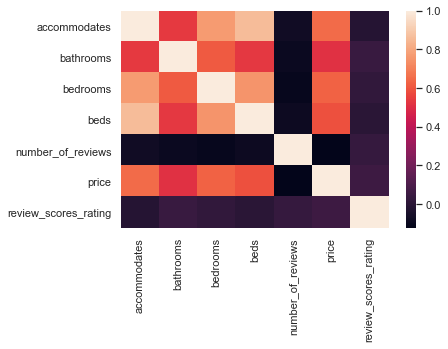

In [102]:
#Select numerical variables
df1_num_vars = df1.select_dtypes(include=['float', 'int'])
sns.set(font_scale=1)
sns.heatmap(df1_num_vars.corr(),annot=False,fmt=".2f")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


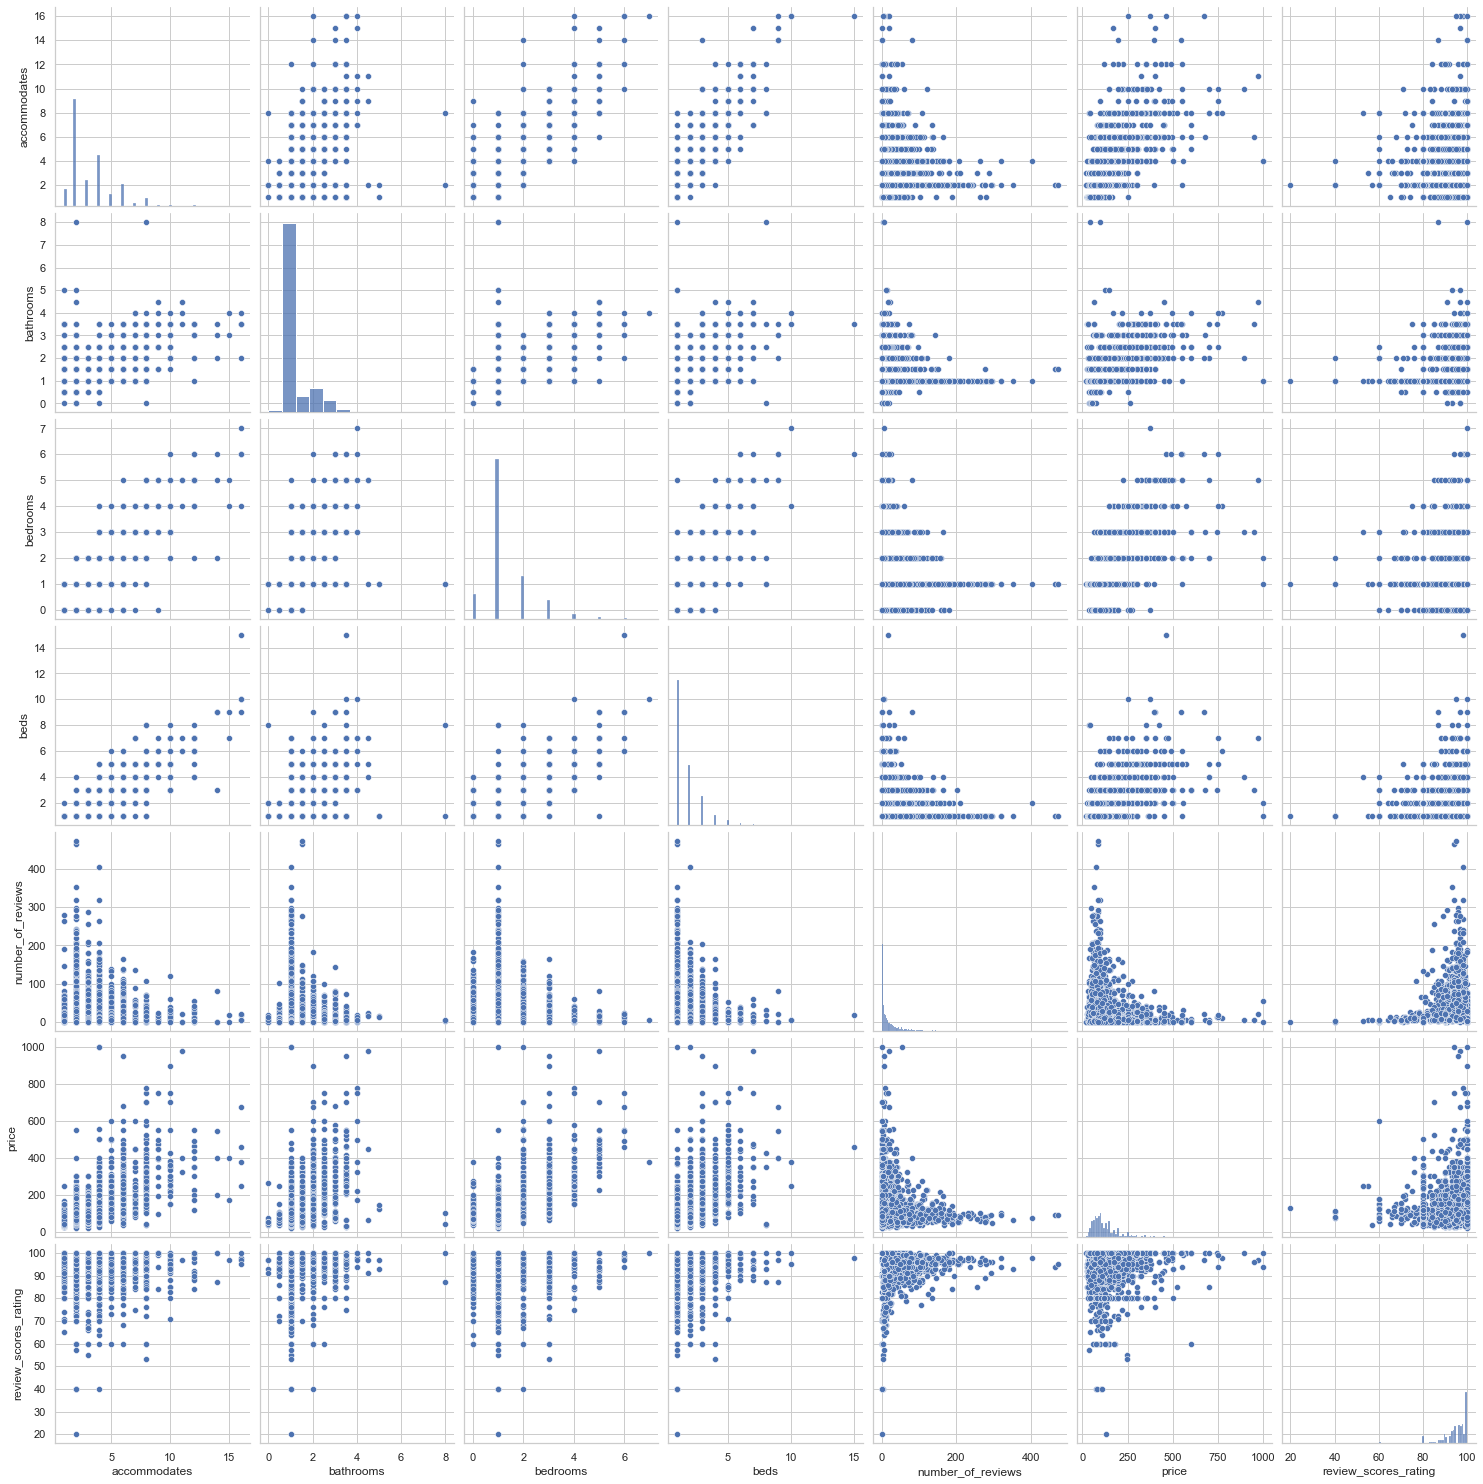

In [103]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(df1,size=3)
plt.show()

### Clean and prepare the data

In [104]:
    #drop 'weekly_price'column that has more than 45% missing values
    df1=df1.drop(['weekly_price','cleaning_fee'],axis=1)
    
    # Drop rows with missing values
    row_0 = df1.shape[0]
    df1 = df1.dropna(how='any', axis=0)
    row_1 = df1.shape[0]
    num_rows_drop= (row_0 - row_1)/row_0
    
    num_rows_drop

0.30434782608695654

In [105]:
 pd.options.mode.chained_assignment = None  # default='warn'
 
 #df1['price'] = df1['price'].astype(str)
 df1['host_response_rate'] = df1['host_response_rate'].astype(str)
 df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype(str)
    
 #df1['price'] = df1['price'].str.replace("[$, ]", "").astype("float")
 df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace("%", "").astype("float")
 df1['host_response_rate'] = df1['host_response_rate'].str.replace("%", "").astype("float")
                   
 df1['superhost']=np.where(df1['host_is_superhost']=='t',1,0)
 
 df1 = df1.drop(['host_is_superhost'], axis=1)

### Perform model selection & Validation

Conduct preliminary linear regression model

In [106]:
def clean_fit_linear_mod(df, test_size=.3, random_state=2):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no prices
    2. Create X as all the columns that are not the price column
    3. Create y as the price column
    4. Drop the Price columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    
    #Pull a list of the column names of all numerical variables 
    #num_vars = df.select_dtypes(include=['float', 'int']).columns
                   
    # Fill numeric columns with the mean
    # Mean Function
    #for col in num_vars:
         #df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    #Split into explanatory and response variables
    X = df.drop(['price'], axis=1)
    y = df['price']
    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return X, y, X_train, X_test, y_train, y_test,y_train_preds,y_test_preds

In [107]:
X, y, X_train1, X_test1, y_train1, y_test1, y_train_preds1,y_test_preds1 = clean_fit_linear_mod(df1) 

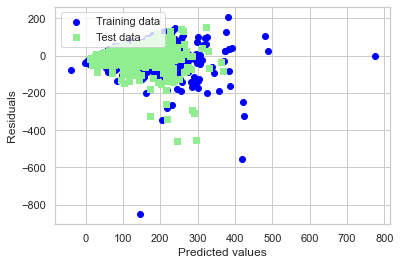

In [108]:
plt.scatter(y_train_preds1,  y_train_preds1 - y_train1,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds1,  y_test_preds1 - y_test1,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

Perfrom tuning and find the optimal model

In [109]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=2, plot=True):
 '''
 INPUT
 X - pandas dataframe, X matrix
 y - pandas dataframe, response variable
 cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
 test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
 random_state - int, default 42, controls random state for train_test_split
 plot - boolean, default 0.3, True to plot result

 OUTPUT
 r2_scores_test - list of floats of r2 scores on the test data
 r2_scores_train - list of floats of r2 scores on the train data
 lm_model - model object from sklearn
 X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
 '''
 r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
  
 for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

 if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

 best_cutoff = max(results, key=results.get)

  #reduce X matrix
 reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
 num_feats.append(reduce_X.shape[1])

  #split the data into train and test
 X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

  #fit the model
 lm_model = LinearRegression(normalize=True)
 lm_model.fit(X_train, y_train)

 return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

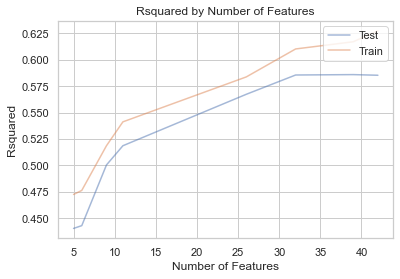

In [110]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]
#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [111]:
print(X_train.shape[1])
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

39
0.5859251369043548
0.6169884953007714


### Coeffiencies of the model

The default penalty on coefficients using linear regression in sklearn is a ridge(also know as an L2) penalty. Because of penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the price. The larger the coefficient, the larger the impact on price.

In [114]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframeholding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients in a linear model by providing the coefficient estimates along with the name of the variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs',ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_,X_train)

coef_df.head(20)

,est_int,coefs,abs_coefs
18,room_type_Shared room,-76.163678,76.163678
31,zipcode_98118,-42.491146,42.491146
25,zipcode_98108,-40.964167,40.964167
17,room_type_Private room,-37.820824,37.820824
23,zipcode_98106,-37.113948,37.113948
28,zipcode_98115,-36.222666,36.222666
35,zipcode_98125,-35.278883,35.278883
36,zipcode_98126,-34.679512,34.679512
37,zipcode_98144,-30.651406,30.651406
2,bedrooms,30.636287,30.636287


### Insights & Conclusion

The machine learning modeling is used to find out features among both numerical and dummy variables to predict Airbnb prices. The optimal model consists of 39 features. The top 3 positive features are: bedrooms, bathrooms, and zipcode(98104). The most 3 negative features are room type(Shared room), zipcode(98118), and zipcode(98108).